In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/")
!ls

GitStuff  ProyectoML  Semana1	Semana2  Semana4  Semana6  Semana8
Parcial2  README.md   Semana10	Semana3  Semana5  Semana7  Semana9


In [11]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana10/Data/MinimosLineal.txt'
#file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana10/Data/Exponencial.dat'
file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana10/Data/MinimosLineal.txt'

In [35]:
data = pd.read_csv(file,sep=' ')
data.columns = ['x','y']
x = np.array(data['x'])
y = np.array(data['y'])

sigma = np.random.normal(1,2,len(x))
sigma = np.abs(sigma)
sigma

array([0.34409537, 1.99802492, 3.17929278, 2.5977506 , 1.0427926 ,
       0.51638237, 1.13519916, 4.33042996, 2.10419796, 0.14511528,
       3.14413982, 3.04987073, 0.37243004, 0.51030943, 3.60556077,
       3.24614977, 1.82343308, 3.03430754, 1.06735468])

Text(0, 0.5, 'y')

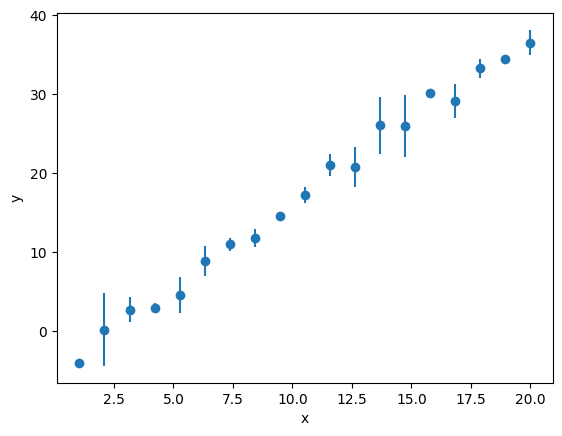

In [19]:
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [27]:
import scipy.optimize as spo

In [28]:
def GetModel1(x,p):
  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n
  return y

In [29]:
def Chi2(p,x,y,sigma,Model):
  return np.sum(((y-Model(x,p))/sigma)**2)

In [38]:
p0 = np.ones(2)
p0

array([1., 1.])

In [39]:
nll = lambda *p: Chi2(*p)

In [40]:
result = spo.minimize(nll,p0,args=(x,y,sigma,GetModel1), options={"disp":True})

         Current function value: 33.616627
         Iterations: 6
         Function evaluations: 104
         Gradient evaluations: 31


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [42]:
param = result.x
t = np.linspace(min(x),max(x),100)
param

array([-6.25255781,  2.24583548])

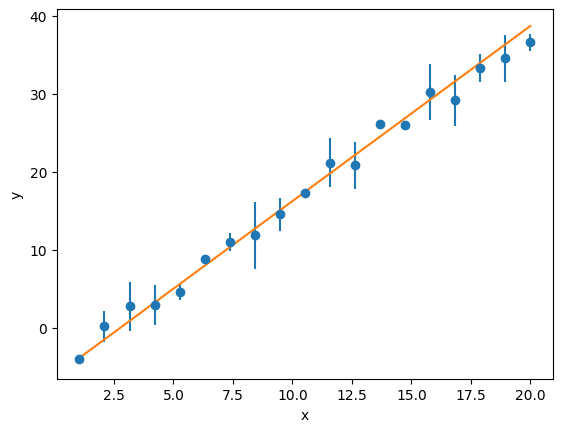

In [43]:
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(t,GetModel1(t,param))